<a href="https://colab.research.google.com/github/Ch0ro/ML-DL/blob/master/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법
> 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘  
> 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 미니배치 경사 하강법  
> 한 번에 전체 샘플을 사용하면 배치 경사 하강법
## 에포크
> 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미  
> 일반적으로 경사 하강법 알고리즘은 수십에서 수백 번의 에포크를 반복

# 손실 함수
> 확률적 경사 하강법이 최적화할 대상  
> 이진 분류에는 로지스틱 회귀 (또는 이진 크로스엔트로피) 손실 함수를 사용  
> 다중 분류에는 크로스엔트로피 손실 함수를 사용  
> 회귀 문제에는 평균 제곱 오차 손실 함수를 사용

# SGDClassifier

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [7]:
sc.partial_fit(train_scaled, train_target) #SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련하기위한 메서드 즉, 호출할 때마다 1 에포크씩 모델을 이어서 훈련한다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


# 에포크와 과대/과소적합

In [8]:
import numpy as np

sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [10]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

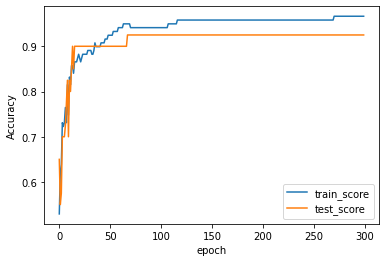

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()



*   백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어짐
*   에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮음
*   이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보임





In [16]:
# 반복 횟수(max_iter) = 100으로 맞추고 모델 생성

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) 
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925




*   일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤. 
tol은 향상될 최솟값을 지정하는 매개변수
*   loss의 기본값은 'hinge'로 힌지 손실은 서포트 벡터 머신(SVM)이라는 머신러닝 알고리즘을 위한 손실 함수



## 힌지 손실을 사용한 모델 훈련

In [18]:
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
